# Introduction
Data yang digunakan merupakan data Uber dan Lyft yang terdiri dari 57 atribut. Data ini akan digunakan untuk membuat model prediksi harga berdasarkan fitur-fitur tertentu. Dari ke 57 fitur tersebut diputuskan untuk menggunakan hanya 10 fitur yang diduga memiliki pengaruh terhadap harga. Berikut fitur-fitur yang digunakan :
x :
- temperature - suhu udara pada waktu penumpang menggunakan taxi
- short summary - cuaca saat penumpang menggunakan taxi
- wind Speed - kecepatan angin  
- distance- jarak dari titik penjemputan sampai lokasi tujuan
- hour - waktu saat penjemputan
- cab_type- nama taxi yang digunakan
- name : Lyft, Lyft XL,Lux, Lux Black, Lux Black XL
- month- bulan pada saat penumpang menaiki taxi

y:
- price

Fitur-fitur x  akan dieksplorasi lebih lanjut untuk memastikan korelasinya dengan y  (harga). 
Selanjutnya akan dilakukan data preprocessing untuk menyiapkan data agar dapat digunakan untuk membuat model machine learning

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
df=pd.read_csv("d:Hactiv8/dataset/rideshare_kaggle.csv")
pd.set_option("display.max.columns", None)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
df.shape

(693071, 57)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

dataset tersebut hanya memuat data pada bulan 11 dan 12 ditahun 2009 

# Data Cleaning

In [6]:
#mengambil fitur-fitur yang akan digunakan untuk linear regression dan menyimpannya dalam variabel baru
use_cols=['cab_type','name','hour','month','distance','temperature','short_summary','windSpeed','price']
df_for_LR=df[use_cols]
df_for_LR.head()

,cab_type,name,hour,month,distance,temperature,short_summary,windSpeed,price
0,Lyft,Shared,9,12,0.44,42.34,Mostly Cloudy,8.66,5.0
1,Lyft,Lux,2,11,0.44,43.58,Rain,11.98,11.0
2,Lyft,Lyft,1,11,0.44,38.33,Clear,7.33,7.0
3,Lyft,Lux Black XL,4,11,0.44,34.38,Clear,5.28,26.0
4,Lyft,Lyft XL,3,11,0.44,37.44,Partly Cloudy,9.14,9.0


In [7]:
#Memeriksa missing value
df_for_LR.isnull().sum()

cab_type             0
name                 0
hour                 0
month                0
distance             0
temperature          0
short_summary        0
windSpeed            0
price            55095
dtype: int64

Terdapat missing value pada fitur price, melihat ada cukup banyak missing value yaitu ada sebanyak 55.095 baris, maka missing value ini akan didrop tetapi tidak akan dibuang melainkan dsimpan dalam variabel tersendiri untuk nantinya diisi setelah model machine learning telah dibuat

In [8]:
#memisahkan baris yang mengandung missing value
df_for_LR_NA=df_for_LR[df['price'].isnull()==True]
df_for_LR_NA.head()

,cab_type,name,hour,month,distance,temperature,short_summary,windSpeed,price
18,Uber,Taxi,14,12,1.11,36.99,Partly Cloudy,5.87,NaN
31,Uber,Taxi,23,12,2.48,48.83,Overcast,2.83,NaN
40,Uber,Taxi,20,11,2.94,42.50,Partly Cloudy,10.68,NaN
60,Uber,Taxi,20,12,1.16,33.15,Mostly Cloudy,3.02,NaN
69,Uber,Taxi,13,11,2.67,31.80,Clear,2.10,NaN


In [9]:
df_for_LR_NA.shape

(55095, 9)

In [10]:
df_for_LR_NA['cab_type'].value_counts()

Uber    55095
Name: cab_type, dtype: int64

seluruh baris yang memiliki missing value merupakan data uber

In [11]:
#meghapus baris yang terdapat missing value 
df_for_LR=df_for_LR.dropna()
df_for_LR.head()

,cab_type,name,hour,month,distance,temperature,short_summary,windSpeed,price
0,Lyft,Shared,9,12,0.44,42.34,Mostly Cloudy,8.66,5.0
1,Lyft,Lux,2,11,0.44,43.58,Rain,11.98,11.0
2,Lyft,Lyft,1,11,0.44,38.33,Clear,7.33,7.0
3,Lyft,Lux Black XL,4,11,0.44,34.38,Clear,5.28,26.0
4,Lyft,Lyft XL,3,11,0.44,37.44,Partly Cloudy,9.14,9.0


In [12]:
df_for_LR.shape

(637976, 9)

mengganti nama kolom :
- cab_type menjadi companies
- name menajadi service_class
- windSpeed menjadi wind_speed
- hour menjadi time
- short_summary menjadi weather


In [13]:
df_for_LR.rename(columns={'cab_type':'companies','hour':'time',
                         'short_summary':'weather',
                          'name':'service_class','windSpeed':'wind_speed'},inplace=True)
df_for_LR.head(3)

,companies,service_class,time,month,distance,temperature,weather,wind_speed,price
0,Lyft,Shared,9,12,0.44,42.34,Mostly Cloudy,8.66,5.0
1,Lyft,Lux,2,11,0.44,43.58,Rain,11.98,11.0
2,Lyft,Lyft,1,11,0.44,38.33,Clear,7.33,7.0


# Data Exploration

In [14]:
#Melihat deskripsi statistik singkat data yang digunakan
df_for_LR.describe()

,time,month,distance,temperature,wind_speed,price
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,11.618528,11.586550,2.189261,39.582406,6.186795,16.545125
std,6.948776,0.492452,1.135413,6.725500,3.147856,9.324359
min,0.000000,11.000000,0.020000,18.910000,0.450000,2.500000
25%,6.000000,11.000000,1.270000,36.450000,3.410000,9.000000
50%,12.000000,12.000000,2.160000,40.490000,5.910000,13.500000
75%,18.000000,12.000000,2.930000,43.580000,8.410000,22.500000
max,23.000000,12.000000,7.860000,57.220000,15.000000,97.500000


- rata-rata penumpang menggunakan taxi sekitar pukul 12
- jarak yang ditempuh berkisar 0.02 hingga 7.86, dengan rata-rata 2.19
- suhu udara cukup bervariasi mulai dari 18.91 hingga 57.22 dengan rata-rata suhu udara 39.5 
- kecepatan angin ada direntang 0.45 hingga 15 dengan rata-rata 6.19
- tarif taxi berkisar di 2.5 hingga paling tinggi 97.5 dan rata-rata 16.5

In [24]:
#melihat jumlah data pada masing-masing perusahaan 
df_companies=pd.DataFrame(df_for_LR['companies'].value_counts())
df_companies

,companies
Uber,330568
Lyft,307408


Dataset yang digunakan memuat dua perusahaan taxi yaitu Uber dan Lyft

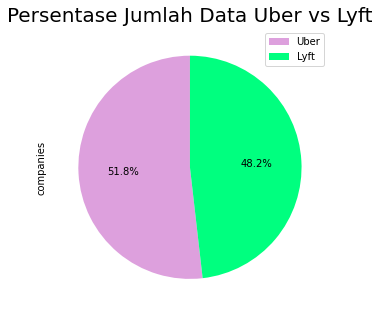

In [39]:
#membandingkan jumlah data masing-masing perusahaan
df_companies['companies'].plot(kind='pie', figsize=(5,6),
                              autopct='%1.1f%%',startangle=90,
                              labels=None, colors=['plum','springgreen'])
plt.title('Persentase Jumlah Data Uber vs Lyft', fontsize=20)
plt.legend(labels=df_companies.index)
plt.show()

Data Uber dan Lyft yang tersedia cukup imbang dengan selisih hanya 3.6% sehingga cukup baik untuk nantinya digunakan saat melatih model prediksi

In [15]:
#Melihat layanan yang tersedia pada taxi Lyft
df_for_LR[(df_for_LR['companies']=='Lyft')].groupby(['service_class'])['service_class'].count()

service_class
Lux             51235
Lux Black       51235
Lux Black XL    51235
Lyft            51235
Lyft XL         51235
Shared          51233
Name: service_class, dtype: int64

Layanan taxi Lyft terbagi menjadi 6 kelas seperti yang diperlihatkan data diatas dan datanya terdistribusi sama rata

In [16]:
#Melihat layanan yang tersedia pada taxi Uber
df_for_LR[(df_for_LR['companies']=='Uber')].groupby(['service_class'])['service_class'].count()

service_class
Black        55095
Black SUV    55096
UberPool     55091
UberX        55094
UberXL       55096
WAV          55096
Name: service_class, dtype: int64

Layanan taxi uber juga terbagi menjadi 6 kelas dan terdistribusi sama rata 